### __Group Assignment - Predicting Airbnb Listing Prices in Melbourne, Australia__

--- 

**Kaggle Competition Ends:** Friday, 6 June 2025 @ 3:00pm (Week 13)  
**Assignment Due Date on iLearn:** Friday, 6 June 2025 @ 11.55pm (Week 13)   
**Total Marks:** 30

**Overview:**   

- In the group assignment you will form a team of 3 students and participate in a forecasting competition on Kaggle


**Instructions:** 

- Form a team of 3 students 
- Each team member needs to join [https://www.kaggle.com](https://www.kaggle.com/)  
- Choose a team leader and form a team on Kaggle [https://www.kaggle.com/t/fc5974a56165cea945ee1ec182b079af](https://www.kaggle.com/t/fc5974a56165cea945ee1ec182b079af)
    - Team leader to click on `team` and invite other 2 team members to join
    - Your **team's name must start** with our unit code
- All team members should work on all the tasks however   
    - Each team member will be responsible for one of the 3 tasks listed below    
- **Your predictions must be generated by a model you develop here** 
    - You will receive a mark of **zero** if your code is not able produce the forecasts you submit to Kaggle 

**Competition Rankings**

The rankings for the competition are determined through two different leaderboards:

- **Public Leaderboard Ranking**: Available during the competition, these rankings are calculated based on 50% of the test dataset, which includes 1,500 observations. This allows participants to see how they are performing while the competition is still ongoing.
- **Final Leaderboard Ranking**: These rankings are recalculated from the other 50% of the test dataset, which consists of the remaining 1,500 observations, and are revealed 5 minutes after the competition concludes. This final evaluation determines the ultimate standings of the competition.



**Marks** 

- Assignment: 30 marks consisting of Solutions (27 marks) + Video Presentation (3 marks)
- **Each Student's Mark: 50% x overall assignment mark + 50% x mark for the task that you are responsible for**  



**Submissions:**  

1. On Kaggle: submit your team's forecast in order to be ranked by Kaggle
2. On iLearn **only team leader to submit** the assignment Jupyter notebook re-named to your team's name on Kaggle   
    - The Jupyter notebook must contain team members names/ID numbers, and the group name Kaggle
    - One 15 minute video recording of your work 
        - 5 marks will be deducted from each Task for which there is no video presentation   


---
---

### >**Fill out the following information**

- Team Name on Kaggle: `(COMP3020 Back Benchers)`
- Team Leader and Team Member 1: `(Max Cochrane)`
- Team Member 2: `(Rohini Maharaj)`
- Team Member 3: `(Shambhav Shrestha)`

---

## Task 1: Problem Description and Initial Data Analysis

- You must clearly explain all your answers in both the Markdown file and the recorded video.

**Total Marks: 9**   

Based on the Competition Overview, datasets and additional information provided on Kaggle, along with insights gained from personal research of the topic, write **Problem Description** (about 500 words) focusing on the sections listed below: 
1. Forecasting Problem - explain what we are trying to do and how it could be used in the real world, e.g. who and how may benefit from it (2 marks)    
2. Evaluation Criteria - discuss the criterion that is used in this competition to assess forecasting performance, and its pros and cons. (2 marks)     
3. Categorise all variables provided in the dataset according to their type; Hint: similar to what we had in Programming Task 1 (2 marks)  
4. Missing Values - explain what you find for both the training and test datasets at this stage (2 marks)
5. Provide and discuss some interesting *univariate* data characteristics (e.g. summary statistics and plots) in the training dataset  (1 marks)       
- Hints:
    - You should **not** discuss any specific predictive algorithms at this stage


Student in charge of this task: `(Rohini Maharaj)`

In [230]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import datetime
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.gridspec import GridSpec
import numpy as np

train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
solution = pd.read_csv('sample-solution.csv')

## 1. **Forecasting Problem**
The primary objective of this assignment is to accurately forecast the nightly prices of Airbnb listings based on the features provided in the new dataset. This forecasting capability is essential for delivering strategic business value across several segments of the short-term rental market. Precise price predictions can have significant implications in the following areas:

**Host revenue optimisation**: 
Hosts can use reliable price forecasts to avoid under-pricing (which would reduce their potential earnings) and over-pricing (which could deter prospective guests). By aligning their rates with anticipated demand and comparable listings, hosts maintain a competitive advantage and maximise occupancy.

**Occupancy and yield management**:
Property managers and platform operators can leverage price forecasts to understand seasonal and local market trends. This insight enables informed decisions about when to adjust prices to smooth occupancy rates, thereby improving overall yield and reducing vacant nights.

**Investment and portfolio planning**:
Investors and portfolio managers who hold multiple short-term rental properties can use forecasting to evaluate which neighbourhoods or property types are likely to yield higher returns. By anticipating price trends, they can make data-driven decisions about property acquisition, renovation budgets and targeted marketing campaigns.

These objectives align with the new dataset’s structure, which includes listing attributes such as location (neighbourhood), room type, number of bedrooms and bathrooms, amenities, host experience and other listing details. Your task is to preprocess the data, engineer relevant features, and develop one or more machine learning models that can predict the “price” column for unseen listings (i.e. the test set), ensuring that the predictions are as accurate as possible.

## **2. Evaluation Criteria**

Mean Absolute Error (MAE) metric would be utilised to evaluate the performance of the regression models defining as the average difference between predicted and actual values. Advantages - Intuitive interpretation ability, it is easy to interpret/understand as it represents the average differences between predicted and actual values. MAE linear penalty allows equal assignment of error weights regardless of its size/scale. Disadvantages – MAE can be easily influenced by the outliers which might provide inaccurate representation on the model’s performance. Due to MAE’s equal treatment to overpredictions and underprediction, there is no consideration of error directions. By using MAE evaluation metric, the development of the model’s should accurately predict Airbnb listing prices, focusing on minimising average error.

## **3. Categorising Values**
 |Variable Type|Number of Features|Feature Names| 
 |---|---|---| 
 |**Numeric** | 9 | price, latitude, longitude, accommodates, bedrooms, bathrooms, beds, number_of_reviews, review_scores_rating |
 | **Categorical** | 5 | room_type, property_type, neighbourhood, cancellation_policy, host_is_superhost |
 | **Boolean** | 3 | instant_bookable, host_has_profile_pic, host_identity_verified |
 | **Date/Time** | 4 | host_since, first_review, last_review, calendar_updated |
 | **Text** | 3 | name, description, neighbourhood_overview | 
 
 <br> 
 Five main variable types: Numeric (9 features), Categorical (5 features), Boolean (3 features), Date/Time (4 features) and Text (3 features)
Numeric variables are numbers, categorical variables are non-ordered groups, boolean variables are True/False values, date/time variables record dates or times, and text variables contain free-form text.

In [234]:
#Data type identification
print("===============================================================")
print("       Data-Type Identification for Training and Test Data Sets") 
print("===============================================================")

print("---------------------------------------------------------------")
print("Training Dataframe")
print("---------------------------------------------------------------")
print(train.dtypes)

print("---------------------------------------------------------------")
print("Test Dataframe")
print("---------------------------------------------------------------")
print(test.dtypes)

       Data-Type Identification for Training and Test Data Sets
---------------------------------------------------------------
Training Dataframe
---------------------------------------------------------------
ID                                                int64
source                                           object
name                                             object
description                                      object
neighborhood_overview                            object
                                                 ...   
calculated_host_listings_count_entire_homes       int64
calculated_host_listings_count_private_rooms      int64
calculated_host_listings_count_shared_rooms       int64
reviews_per_month                               float64
price                                            object
Length: 61, dtype: object
---------------------------------------------------------------
Test Dataframe
---------------------------------------------------------------
ID  

### **Data Type Findings**

---

The dataset comprises approximately 50% categorical/text features, 35% numeric features and 15% date or boolean style features. Most object-type columns such as `source`, `name`, `description`, `neighborhood_overview`, `host_name`, `property_type`, `room_type` and `amenities` will need encoding or natural-language processing for any free-text fields. Date fields (for example, `host_since`, `first_review`, `last_review` and `calendar_updated`) must be converted into datetime format. Boolean-style features such as `instant_bookable`, `host_has_profile_pic` and `host_identity_verified` are currently stored as text and should be cast to binary values (0 or 1). Numeric columns such as `ID`, `host_listings_count`, `latitude`, `longitude`, `accommodates`, `bedrooms`, `beds`, `availability_30`, `number_of_reviews` and `review_scores_rating` can be used directly or scaled for modelling. Both the training and test sets share the same schema and data types so any preprocessing steps applied to one can be mirrored on the other without error.


## **4. Missing Values**

In [237]:
#Total Missing values for 'Test'and 'Train' datasets
print("===============================================================")
print("        Missing Value Identification for both Datasets         ") 
print("===============================================================")

print("---------------------------------------------------------------")
print("Train Dataframe")
print("---------------------------------------------------------------")
print(train.isnull().sum())

print("---------------------------------------------------------------")
print("Test Dataframe")
print("---------------------------------------------------------------")
print(test.isnull().sum())

        Missing Value Identification for both Datasets         
---------------------------------------------------------------
Train Dataframe
---------------------------------------------------------------
ID                                                 0
source                                             0
name                                               1
description                                       57
neighborhood_overview                           1823
                                                ... 
calculated_host_listings_count_entire_homes        0
calculated_host_listings_count_private_rooms       0
calculated_host_listings_count_shared_rooms        0
reviews_per_month                                  0
price                                              0
Length: 61, dtype: int64
---------------------------------------------------------------
Test Dataframe
---------------------------------------------------------------
ID                                       

### **Missing Values Findings**


The missing values indicate that both the training and test datasets are largely complete, with the train dataset exhibiting 97.23% data completeness and the test dataset showing 93.13% completeness. However, several features have missing values that could impact analytical outcomes if not addressed:

**Train Dataset:**

* `name` is missing in 1 listing (0.01%).
* `description` is missing in 57 listings (0.81%).
* `neighborhood_overview` is missing in 1 823 listings (26.04%).
* All other columns have no missing entries.

Since `neighborhood_overview` is absent for 26.04% of listings and `description` is missing for 0.81% of listings, these text fields will require either imputation (for example, filling with "No overview provided") or exclusion. The single missing `name` (0.01%) can be filled with a generic placeholder or removed without materially affecting the dataset.

**Test Dataset:**

* `description` is missing in 31 listings (1.03%).
* `neighborhood_overview` is missing in 1 424 listings (47.47%).
* `host_location` is missing in 770 listings (25.67%).
* `host_about` is missing in 1 441 listings (48.03%).
* `host_response_time` is missing in 737 listings (24.57%).
* `host_response_rate` is missing in 737 listings (24.57%).
* `host_acceptance_rate` is missing in 658 listings (21.93%).
* `host_is_superhost` is missing in 2 listings (0.07%).
* `host_neighbourhood` is missing in 2 066 listings (68.87%).
* `neighbourhood` is missing in 1 424 listings (47.47%).
* `neighbourhood_cleansed` is missing in 42 listings (1.40%).
* `property_type` is missing in 39 listings (1.30%).
* `room_type` is missing in 41 listings (1.37%).
* `bedrooms` is missing in 60 listings (2.00%).
* `beds` is missing in 12 listings (0.40%).
* `minimum_minimum_nights` is missing in 10 listings (0.33%).
* `maximum_maximum_nights` is missing in 10 listings (0.33%).
* `availability_365` is missing in 20 listings (0.67%).
* `first_review` is missing in 263 listings (8.77%).
* `last_review` is missing in 263 listings (8.77%).
* `review_scores_rating` is missing in 263 listings (8.77%).
* `review_scores_accuracy` is missing in 299 listings (9.97%).
* `review_scores_cleanliness` is missing in 299 listings (9.97%).
* `review_scores_checkin` is missing in 300 listings (10.00%).
* `review_scores_communication` is missing in 300 listings (10.00%).
* `review_scores_location` is missing in 300 listings (10.00%).
* `review_scores_value` is missing in 300 listings (10.00%).
* `reviews_per_month` is missing in 263 listings (8.77%).

These gaps are concentrated in text fields such as `description`, `neighborhood_overview` and `host_about`, host-related attributes such as `host_location`, `host_response_time`, `host_response_rate`, `host_acceptance_rate` and `host_neighbourhood`, and review-related scores. Because many of these features carry important contextual or reputation information, a consistent strategy, such as imputing missing text as "No data", filling missing numerical scores with the column median and possibly dropping features with very high missingness, will be necessary.

Addressing these missing values through targeted imputation or, where justified, removal will improve data reliability and ensure that subsequent analyses and models produce accurate, actionable insights.


## **5. Summary Statistics/Visuals**

In [240]:
#printing a statistical summary table of the 'Train' Dataset
print("==================================================================================================================")
print("                                     Summary Statistics Table: 'Training Dataset'                                    ") 
print("==================================================================================================================")

train.describe().T #'T' transforms it to a table

                                     Summary Statistics Table: 'Training Dataset'                                    


,count,mean,std,min,25%,50%,75%,max
ID,7000.0,3.499500e+03,2.020870e+03,0.00000,1749.750000,3499.500000,5249.250000,6.999000e+03
host_listings_count,7000.0,1.562557e+01,4.160006e+01,1.00000,1.000000,3.000000,9.000000,2.920000e+02
latitude,7000.0,-3.782614e+01,8.067217e-02,-38.22411,-37.856415,-37.818565,-37.800105,-3.748645e+01
longitude,7000.0,1.450394e+02,1.817509e-01,144.51780,144.956993,144.980060,145.056391,1.458314e+02
accommodates,7000.0,3.839714e+00,2.514657e+00,1.00000,2.000000,4.000000,5.000000,1.600000e+01
bedrooms,6622.0,1.785865e+00,1.056360e+00,1.00000,1.000000,1.000000,2.000000,1.400000e+01
beds,6928.0,2.263568e+00,1.783209e+00,1.00000,1.000000,2.000000,3.000000,2.200000e+01
minimum_nights,7000.0,4.316000e+00,1.789835e+01,1.00000,1.000000,2.000000,3.000000,1.125000e+03
maximum_nights,7000.0,7.121750e+02,5.036691e+02,1.00000,90.000000,1125.000000,1125.000000,1.000000e+04
minimum_minimum_nights,6955.0,3.787779e+00,1.110649e+01,1.00000,1.000000,2.000000,3.000000,3.600000e+02


In [241]:
# Identifying the correlation between variables in 'Train'
numerical = train.select_dtypes(include=['number'])
numerical_test = test.select_dtypes(include=['number'])

#raw correlation not printed as its visulised below
correlation_train = numerical.corr()

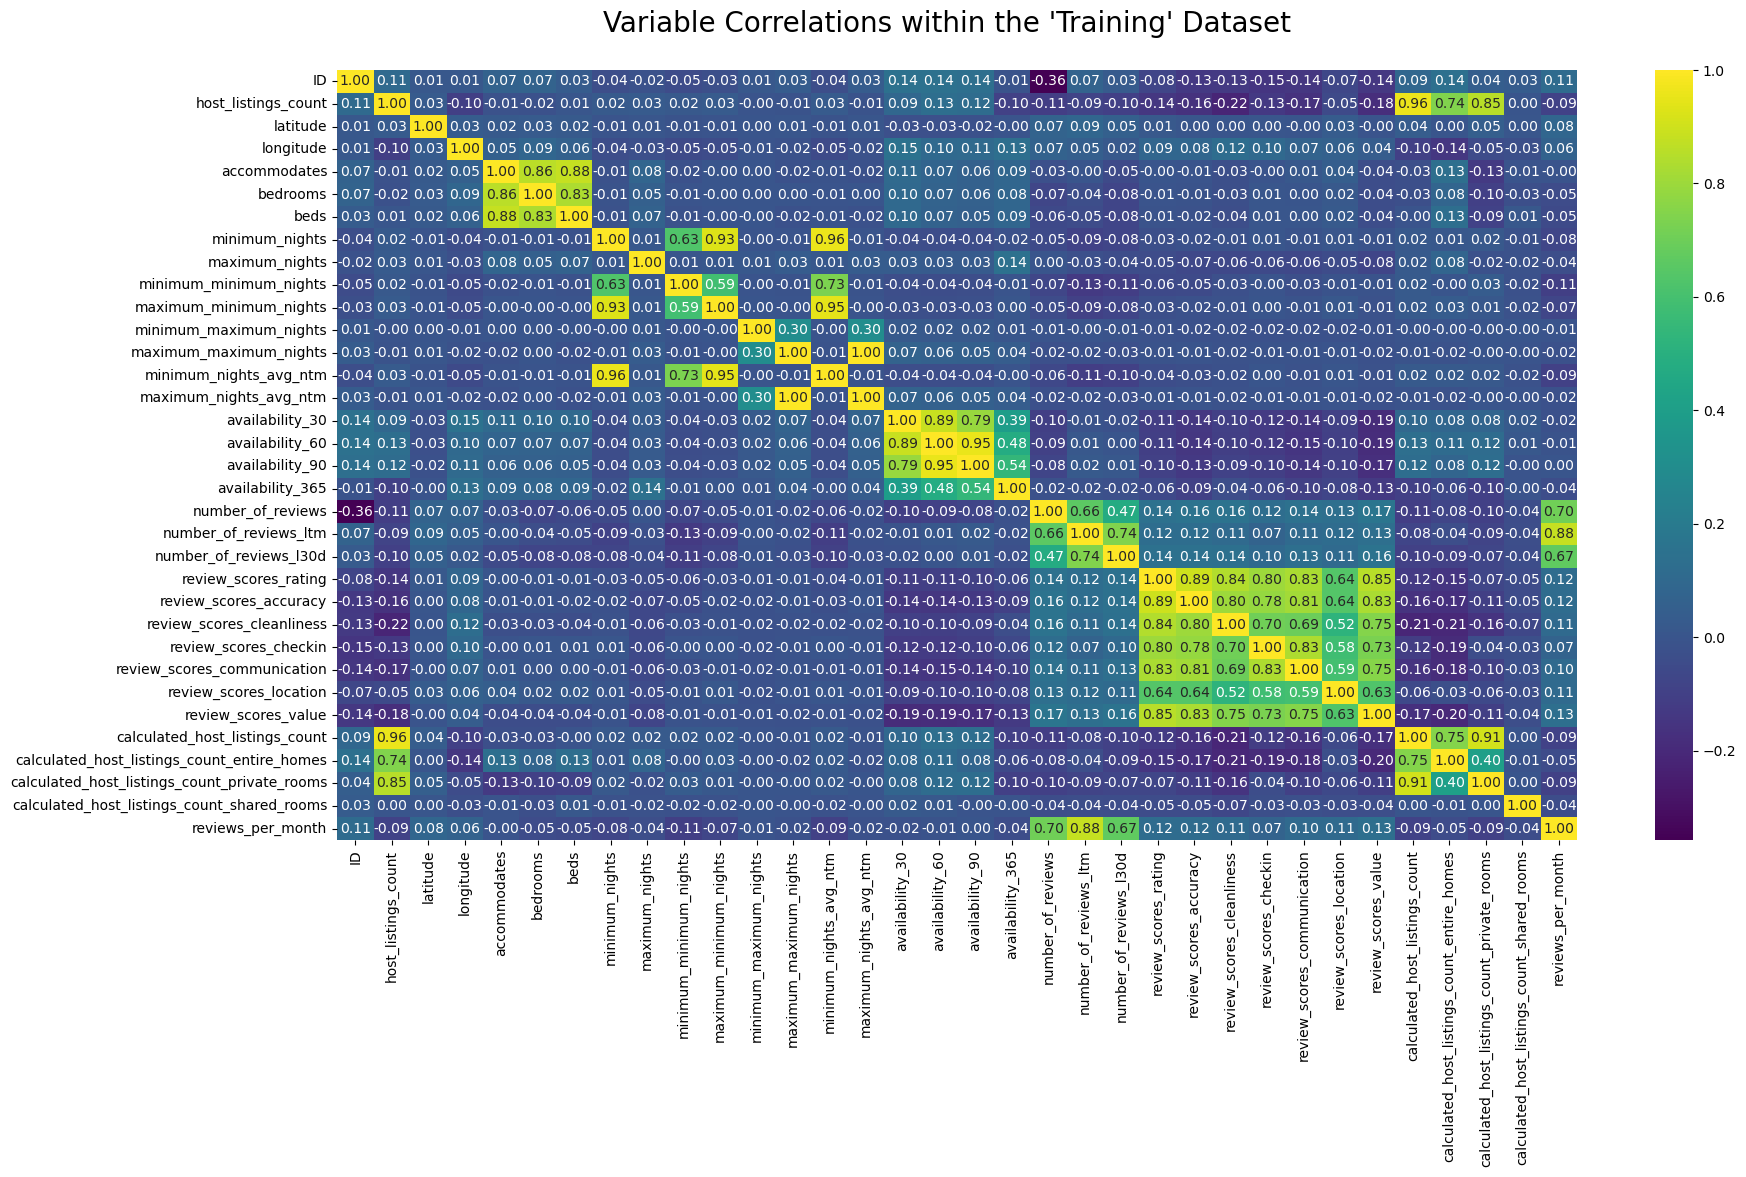

In [242]:
#Visulising the current correlation of 'Train' in a heatmap

#Setting the heatmap sizing
plt.figure(figsize=(20,10))

#Setting a pretty colour map
cmap = 'viridis'

#adding a title (suptitle used as 'title' overlaps with the heatmap), (x) to center it, (y) to add white space between the title and heatmap
plt.suptitle("Variable Correlations within the 'Training' Dataset", x=0.43,y=0.94, fontsize=20)

#adding the correlation annotations to 2 decimal places
sns.heatmap(correlation_train, annot=True,fmt='.2f',cmap=cmap)

#printing the heatmap
plt.show()

## Key Observations and Insights


### Correlation & Univariate Data Characteristics

To uncover data insights, a heatmap was used to show relationships between different variables in ‘Train’, which assists in visualising their correlation. Additionally, summary statistics were performed to identify key characteristics in the data to determine range, variability and central tendency of the features. Both analyses can assist in decision making by highlighting which listing attributes most influence nightly price and where to focus feature engineering for model development.

*Note: The heatmap shows only continuous, numerical variables prior to any data cleaning, transformation or extraction. This is a limitation when analysing correlations.*

### Strong Positive Correlations

* **Review Scores Rating x Review Scores Accuracy (0.89)**
  Listings that score highly for overall rating also tend to score highly for accuracy. This suggests that accuracy of the listing description and amenities contributes significantly to guests’ overall satisfaction. For hosts, emphasising accurate photos and amenity details may improve both accuracy and overall rating.

* **Review Scores Rating x Review Scores Value (0.85)**
  Higher perceived value strongly aligns with a higher overall rating. Guests who feel they receive good value for money tend to rate the listing more favourably. Hosts targeting mid-to-long-stay bookings can focus on value-added services—such as flexible check-in or local guides—to boost both value and overall rating.

* **Availability 30 x Availability 60 (0.89)**
  Listings that are frequently available in the next 30 nights are also likely to be available over 60 nights. This consistency indicates that availability patterns remain stable over short-term windows. Property managers can use this insight for yield management by adjusting minimum-stay rules or pricing during low-availability periods.

* **Bedrooms x Accommodates (0.86)**
  Properties with more bedrooms naturally accommodate more guests. This correlation confirms that larger listings should be marketed at a premium per night compared to smaller units, especially for group travellers or families.

### Strong Negative Correlations

* **Reviews per Month x Number of Reviews (–0.35)**
  A negative correlation exists because ‘number\_of\_reviews’ is cumulative while ‘reviews\_per\_month’ drops as time passes without new reviews. In practical terms, listings with very high total reviews might have few recent reviews, signalling a need to refresh marketing or update amenities to maintain guest interest.

* **Number of Reviews x Availability 365 (–0.20)**
  Listings with many reviews tend to be booked more often, resulting in lower overall annual availability. Hosts can track this metric to balance occupancy and allow for necessary maintenance windows.

* **Review Scores Cleaning x Review Scores Check-in (–0.02)**
  Though weak, a slight inverse relation suggests that very high cleanliness ratings correlate with marginally lower check-in satisfaction, possibly due to hosts prioritising cleaning over streamlined check-in. Understanding this trade-off may help hosts to balance both aspects effectively.

### Weak Price Correlations

* **Price x Bedrooms (0.08)**
  The small positive relationship indicates that listings with more bedrooms generally cost more per night, but the effect is modest. Pricing strategy should also consider location, property type and guest ratings, not bedrooms alone.

* **Price x Accommodates (0.04)**
  A very weak positive link shows that the number of guests capacity has some influence on price but is not the primary driver. Hosts with high-capacity properties might need to rely on superior guest experience (ratings) and location to justify a higher nightly rate.

### Univariate Data Characteristics

* **‘Price’** ranges from \$25 to \$145 160, with a mean of \$285.65 and a median of \$172.00. The wide range indicates both budget-friendly and high-end listings in the market. A right-skewed distribution (mean > median) suggests some very expensive listings pulling the average up.

* **‘Bedrooms’** ranges from 1 to 15, with a mean of 1.79 and a median of 1.00. Most listings have one or two bedrooms (75% have ≤2 bedrooms), indicating that smaller properties dominate the market.

* **‘Accommodates’** spans from 1 to 30 guests, with a mean of 2.56 and a median of 2.00. Over 50% of listings accommodate two guests or fewer, reinforcing the prevalence of smaller, short-stay rentals.

* **‘Number of Reviews’** ranges from 0 to 1 328, with a mean of 28.34 and a median of 10.00. A few listings have very high review counts, while the majority fall below 50 total reviews.

* **‘Review Scores Rating’** spans from 0.00 to 5.00, with a mean of 4.82 and a median of 4.93. Most listings score above 4.50, showing that highly rated properties are the norm.

* **‘Availability 365’** ranges from 0 to 365 days, with a mean of 177.85 and a median of 161.00. Half of all listings are available for 161 days or fewer per year, indicating moderate occupancy levels on average.

By examining both correlation and univariate characteristics, we can see that guest reviews and availability patterns are critical context for pricing. Hosts and platform managers should prioritise improving guest experiences and managing availability to optimise revenue.


In [244]:
#printing output heading
print("===============================================================")
print("           Outlier Identification for both Datasets            ") 
print("===============================================================")

#Identifying the outliers within the 'Train; and 'Test' Dataset using inter-quartile range
def find_outliers_IQR(train):
   q1=numerical.quantile(0.25) #where majority of the data is located 
   q3=numerical.quantile(0.75) #where majority of the data is located
   IQR=q3-q1

#any data not in the majory range is flagged as an outlier
   outliers = numerical[((numerical<(q1-1.5*IQR)) | (numerical>(q3+1.5*IQR)))] 
   return outliers

outliers = find_outliers_IQR(numerical)

#7000 is chosen as thats the max of values in 'Train' 
#[0:36] is used to index all the columns
num = 7000 - outliers.isnull().sum()[0:36] 

print("---------------------------------------------------------------")
print("Number of Outliers: Train Data")
print("---------------------------------------------------------------")
for column, count in num.items():
    print(f"{column}: {count}")
    
#------------------------------------------------------------------------------------------------------------------------------------------    
def find_outliers_IQR_test(numerical_test):
    q1_test = numerical_test.quantile(0.25)
    q3_test = numerical_test.quantile(0.75)
    IQR_test=q3_test-q1_test

    outliers_test = numerical_test[((numerical_test<(q1_test-1.5*IQR_test)) | (numerical_test>(q3_test+1.5*IQR_test)))]
    return outliers_test

outliers_test = find_outliers_IQR_test(numerical_test)

#3000 is chosen as thats the max of values in 'Test'
#[0:37] is used to index all the columns
num_test = 3000 - outliers_test.isnull().sum()[0:37]

print("---------------------------------------------------------------")
print("Number of Outliers: Test Data")
print("---------------------------------------------------------------")
for column, count in num_test.items():
    print(f"{column}: {count}")

           Outlier Identification for both Datasets            
---------------------------------------------------------------
Number of Outliers: Train Data
---------------------------------------------------------------
ID: 0
host_listings_count: 1247
latitude: 864
longitude: 1209
accommodates: 280
bedrooms: 441
beds: 220
minimum_nights: 883
maximum_nights: 1
minimum_minimum_nights: 754
maximum_minimum_nights: 653
minimum_maximum_nights: 4
maximum_maximum_nights: 16
minimum_nights_avg_ntm: 568
maximum_nights_avg_ntm: 15
availability_30: 0
availability_60: 0
availability_90: 0
availability_365: 0
number_of_reviews: 458
number_of_reviews_ltm: 215
number_of_reviews_l30d: 239
review_scores_rating: 428
review_scores_accuracy: 494
review_scores_cleanliness: 408
review_scores_checkin: 481
review_scores_communication: 605
review_scores_location: 407
review_scores_value: 406
calculated_host_listings_count: 1178
calculated_host_listings_count_entire_homes: 1212
calculated_host_listings_count_

The datasets reveal significant outliers across multiple variables, notably in:

* **host\_listings\_count** (17.81% in the training set and 14.70% in the test set)
* **latitude** (12.34% in the training set and 10.33% in the test set)
* **longitude** (17.27% in the training set and 20.83% in the test set)
* **minimum\_nights** (12.61% in the training set and 9.87% in the test set)

High outlier percentages in these features indicate geographic clustering of extreme values, for example listings located far from central areas, and irregular booking requirements, for example very high or very low minimum-night rules. These issues could skew analysis and reduce model performance.

Additional variables with notable outlier rates include:

* **bedrooms** (6.30% in the training set and 7.27% in the test set)
* **beds** (3.14% in the training set and 1.77% in the test set)
* **number\_of\_reviews** (6.54% in the training set and 5.97% in the test set)
* **review\_scores\_communication** (8.64% in the training set and 8.50% in the test set)

These percentages show that a subset of listings have an unusually high bedroom count, an exceptionally large number of reviews or outlier guest-communication scores, all of which may distort model estimates if not addressed.

Effective handling of these outliers through techniques such as trimming extreme values, applying robust scaling or using transformations is crucial to maintain analytical accuracy and ensure stable model predictions across both datasets. Addressing these outliers will help improve the robustness of insights and enhance predictive accuracy in subsequent analysis.


---

## Task 2: Data Cleaning, Missing Observations and Feature Engineering

- You must clearly explain all your answers in both the Markdown file and the recorded video. 

**Total Marks: 9**

Student in charge of this task: `(Shambhav Shrestha)`

**Task 2, Question 1**: Clean **all** numerical features so that they can be used in training algorithms. For instance, `host_response_rate` feature is in object format containing both numerical values and text. Extract numerical values (or equivalently eliminate the text) so that the numerical values can be used as a regular feature.  
(2 marks)

In [252]:
temp_bathrooms_train = train['bathrooms']
temp_price_train = train['price']
temp_host_response_rate_train = train['host_response_rate']
temp_host_acceptance_rate_train = train['host_acceptance_rate']

temp_bathrooms_test = test['bathrooms']
temp_host_response_rate_test = test['host_response_rate']
temp_host_acceptance_rate_test = test['host_acceptance_rate']

Features: (bathrooms, price, host_response_rate and host_acceptance_rate) have been stored in temporary variables so the variables are kept in their original form.

In [254]:
#Rounding latitude to 6 decimal places
train['latitude']  = train['latitude'].round(6)
test['latitude']   = test['latitude'].round(6)

#Rounding longitude to 6 decimal places
train['longitude'] = train['longitude'].round(6)
test['longitude']  = test['longitude'].round(6)

#Rounding bathrooms to 1 decimal place
train['bathrooms'] = train['bathrooms'].round(1)
test['bathrooms']  = test['bathrooms'].round(1)

#Rounding review_scores_rating to 1 decimal place
train['review_scores_rating'] = train['review_scores_rating'].round(1)
test['review_scores_rating']  = test['review_scores_rating'].round(1)

#Rounding review_scores_accuracy to 1 decimal place
train['review_scores_accuracy'] = train['review_scores_accuracy'].round(1)
test['review_scores_accuracy']  = test['review_scores_accuracy'].round(1)

#Rounding review_scores_cleanliness to 1 decimal place
train['review_scores_cleanliness'] = train['review_scores_cleanliness'].round(1)
test['review_scores_cleanliness']  = test['review_scores_cleanliness'].round(1)

#Rounding review_scores_checkin to 1 decimal place
train['review_scores_checkin'] = train['review_scores_checkin'].round(1)
test['review_scores_checkin']  = test['review_scores_checkin'].round(1)

#Rounding review_scores_communication to 1 decimal place
train['review_scores_communication'] = train['review_scores_communication'].round(1)
test['review_scores_communication']  = test['review_scores_communication'].round(1)

#Rounding review_scores_location to 1 decimal place
train['review_scores_location'] = train['review_scores_location'].round(1)
test['review_scores_location']  = test['review_scores_location'].round(1)

#Rounding review_scores_value to 1 decimal place
train['review_scores_value'] = train['review_scores_value'].round(1)
test['review_scores_value']  = test['review_scores_value'].round(1)

In [255]:
print("---------------------------------------------------------------")
print("After Rounding: Training Data")
print("---------------------------------------------------------------")
print(train[['latitude','longitude','bathrooms',
             'review_scores_rating','review_scores_accuracy',
             'review_scores_cleanliness','review_scores_checkin',
             'review_scores_communication','review_scores_location',
             'review_scores_value']].head())
print("---------------------------------------------------------------")
print("After Rounding: Test Data")
print("---------------------------------------------------------------")
print(test[['latitude','longitude','bathrooms',
            'review_scores_rating','review_scores_accuracy',
            'review_scores_cleanliness','review_scores_checkin',
            'review_scores_communication','review_scores_location',
            'review_scores_value']].head())

---------------------------------------------------------------
After Rounding: Training Data
---------------------------------------------------------------
   latitude  longitude      bathrooms  review_scores_rating  \
0 -37.82030  144.99016         1 bath                   4.9   
1 -37.76606  144.97951  1 shared bath                   4.5   
2 -37.90546  145.39447      2.5 baths                   4.8   
3 -37.82163  144.96672      2.5 baths                   4.5   
4 -38.05725  145.33936         1 bath                   4.9   

   review_scores_accuracy  review_scores_cleanliness  review_scores_checkin  \
0                     4.9                        5.0                    4.9   
1                     4.6                        4.0                    4.7   
2                     4.9                        4.8                    4.9   
3                     4.0                        4.5                    4.0   
4                     4.9                        5.0                

**Features rounded to one decimal place for consistency:**
seller_rating, bathrooms, review_scores_rating, review_scores_accuracy, review_scores_cleanliness, review_score_checkin, review_scores_communication, review_scores_location, review_scores_value.

These were all rounded to one decimal place to keep their formats the same.

**Latitude and longitude rounding:**
Latitude and longitude were rounded to six decimal places. Ten decimal places was overly precise while Six decimals align with six-figure military grid references, ensuring accurate location without being too complex.


### **Extracting Numeric Values in Training and Testing data Sets**

In [259]:
#Cleaning Training Data
train['bathrooms'] = pd.to_numeric(train['bathrooms'].astype(str).str.extract(r'(\d+(?:\.\d+)?)', expand=False), errors='coerce')
train['host_response_rate'] = pd.to_numeric(train['host_response_rate'].astype(str).str.extract(r'(\d+(?:\.\d+)?)', expand=False), errors='coerce')
train['host_acceptance_rate'] = pd.to_numeric(train['host_acceptance_rate'].astype(str).str.extract(r'(\d+(?:\.\d+)?)', expand=False), errors='coerce')
train['price'] = pd.to_numeric(train['price'].astype(str).str.replace(r'[\$,]', '', regex=True).str.extract(r'(\d+(?:\.\d+)?)', expand=False), errors='coerce')
#Cleaning Testing Data
test['bathrooms'] = pd.to_numeric(test['bathrooms'].astype(str).str.extract(r'(\d+(?:\.\d+)?)', expand=False), errors='coerce')
test['host_response_rate'] = pd.to_numeric(test['host_response_rate'].astype(str).str.extract(r'(\d+(?:\.\d+)?)', expand=False), errors='coerce')
test['host_acceptance_rate'] = pd.to_numeric(test['host_acceptance_rate'].astype(str).str.extract(r'(\d+(?:\.\d+)?)', expand=False), errors='coerce')

In [260]:
# Verify cleaning
print("---------------------------------------------------------------")
print("After Cleaning: Training Data")
print("---------------------------------------------------------------")
print(train[['bathrooms','host_response_rate','host_acceptance_rate','price']].head())

print("---------------------------------------------------------------")
print("After Cleaning: Test Data")
print("---------------------------------------------------------------")
print(test[['bathrooms','host_response_rate','host_acceptance_rate']].head())

---------------------------------------------------------------
After Cleaning: Training Data
---------------------------------------------------------------
   bathrooms  host_response_rate  host_acceptance_rate   price
0        1.0                 100                  98.0   132.0
1        1.0                 100                  98.0    39.0
2        2.5                 100                  78.0   270.0
3        2.5                  75                  92.0  1000.0
4        1.0                 100                  87.0   116.0
---------------------------------------------------------------
After Cleaning: Test Data
---------------------------------------------------------------
   bathrooms  host_response_rate  host_acceptance_rate
0        1.0               100.0                  99.0
1        1.0               100.0                  97.0
2        NaN                83.0                  99.0
3        1.0                83.0                  99.0
4        1.0                83.0   

Turn the column into text, then grab just the numbers (and any decimal), and finally convert that text of numbers into a numeric type. Example: For “price” we also remove “\$” and commas before pulling out the digits. This cleans the data to make it workable.


**Task 2, Question 2** Create at least 4 new features from existing features which contain multiple items of information.   
(2 marks)

In [264]:
# Get today's date
current = datetime.date.today()

Getting Current Date for Days since last Review and Time as a Host

In [266]:
# Creating a new variable called Amenities Count
train['amenities_count'] = train['amenities'].str.count(',') + 1
test['amenities_count']  = test['amenities'].str.count(',') + 1

# Creating a new variable called Host Tenure in Days
train['Time_as_a_Host'] = (pd.to_datetime(current) - pd.to_datetime(train['host_since'])).dt.days
test['Time_as_a_Host']  = (pd.to_datetime(current) - pd.to_datetime(test['host_since'])).dt.days

# Creating a new variable called Availability Ratio
train['availability_ratio'] = train['availability_365'] / 365
test['availability_ratio']  = test['availability_365'] / 365

# Creating a new variable called Days Since Last Review
train['days_since_last_review'] = (pd.to_datetime(current) - pd.to_datetime(train['last_review'])).dt.days
test['days_since_last_review']  = (pd.to_datetime(current) - pd.to_datetime(test['last_review'])).dt.days

# Creating a new variable called Superhost Flag
train['superhost_flag'] = (train['host_is_superhost'] == 't').astype(int)
test['superhost_flag']  = (test['host_is_superhost'] == 't').astype(int)

# Creating a new variable called Neighbourhood Review Density
train['neighbourhood_review_density'] = train['number_of_reviews'] / train['availability_365']
test['neighbourhood_review_density']  = test['number_of_reviews'] / test['availability_365']

In [267]:
# Verify new features exist
new_features = ['amenities_count','Time_as_a_Host','availability_ratio','days_since_last_review','superhost_flag','neighbourhood_review_density']

print("---------------------------------------------------------------")
print("Checking new features: Training Data")
print("---------------------------------------------------------------")
print(train[new_features].head())

print("---------------------------------------------------------------")
print("Checking new features: Testing Data")
print("---------------------------------------------------------------")
print(test[new_features].head())


---------------------------------------------------------------
Checking new features: Training Data
---------------------------------------------------------------
   amenities_count  Time_as_a_Host  availability_ratio  \
0               38            4465            0.032877   
1               57            5742            0.306849   
2               21            4939            1.000000   
3               13            5472            1.000000   
4               49            5443            0.854795   

   days_since_last_review  superhost_flag  neighbourhood_review_density  
0                     839               0                     61.750000  
1                     821               0                      1.508929  
2                    1089               1                      0.021918  
3                    4879               0                      0.005479  
4                     826               1                      0.685897  
------------------------------------------

### **New Variables**

1) amenities_count

Source data: Derived from the amenities column, which lists all amenities as a comma-separated string (for example “Wifi,Kitchen,Air conditioning,Heating”).

How it’s made: We count how many commas appear in the amenities text and add one. For instance, three commas means four amenities. This gives us a single integer showing how many extras the host provides, since more amenities often relate to a higher nightly rate.

2) host_tenure_days

Source data: Based on the host_since column, which records the date the host joined Airbnb.

How it’s made: We calculate today’s date (current = datetime.date.today()), convert the host’s join date to a pandas datetime, then subtract the join date from today. The result is the total number of days the host has been active. Hosts who have been around longer often charge more because they have built experience and trust.

3) availability_ratio

Source data: Taken from availability_365, the number of days the listing is available over the next year.

How it’s made: We divide the “days available” value by 365 to get a number between 0 and 1. A low ratio, close to 0, means the place is booked most of the year, indicating high demand and justifying a higher price. A high ratio, close to 1, means the listing is open nearly every day, suggesting lower demand.

4) days_since_last_review

Source data: Based on the last_review column, which shows the date of the most recent guest review.

How it’s made: We subtract the date of the last review from today’s date (current = datetime.date.today()), after converting both to pandas datetime. The result is how many days have passed since someone last reviewed the listing. Listings with very recent reviews tend to be more active, which can support a premium rate.

5) superhost_flag

Source data: Taken from host_is_superhost, which indicates whether the host is a Superhost (“t” for true or “f” for false).

How it’s made: We check if host_is_superhost equals “t” and convert that to 1; otherwise we use 0. A value of 1 shows the host is a Superhost, a status that often allows them to charge more because guests trust them more.

6) neighbourhood_review_density

Source data: Combines number_of_reviews (total reviews) with availability_365 (days the listing is available in a year).

How it’s made: We divide total reviews by the number of available days. This tells us how many reviews the listing receives on average for each day it is open. A higher density indicates popularity, which usually corresponds to a higher price.

Six features give the model more validity by adding host reputation and listing popularity, making price predictions more accurate. Four features may not caputre as many features and may have a less accurate prediction

**Task 2, Question 3**: Impute the missing values for all features in both the training and test datasets.   
(2 marks)

In [270]:
# Numeric features with missing values
num_train_missing = ['bedrooms','beds','minimum_minimum_nights','maximum_maximum_nights','availability_365','review_scores_accuracy','review_scores_cleanliness','review_scores_checkin','review_scores_communication','review_scores_location','review_scores_value','bathrooms','host_response_rate','host_acceptance_rate']

# replaces with train medians
median_values = train[num_train_missing].median()
train[num_train_missing] = train[num_train_missing].fillna(median_values)
test[num_train_missing]  = test[num_train_missing].fillna(median_values)

# Numeric features in test not in train
extra_num_test_missing = ['review_scores_rating', 'reviews_per_month']
extra_medians = train[extra_num_test_missing].median()
train[extra_num_test_missing] = train[extra_num_test_missing].fillna(extra_medians)
test[extra_num_test_missing]  = test[extra_num_test_missing].fillna(extra_medians)

# Date features to be treat as categorical
date_cols = ['first_review', 'last_review']
for col in date_cols:
    mode_val = train[col].mode().iloc[0]
    train[col] = train[col].fillna(mode_val)
    test[col]  = test[col].fillna(mode_val)

# Categorical features with missing values
cat_train_missing = ['name','description','neighborhood_overview','host_location','host_about','host_neighbourhood','neighbourhood','neighbourhood_cleansed','property_type','room_type','host_is_superhost','host_response_time']

mode_values = train[cat_train_missing].mode().iloc[0]
train[cat_train_missing] = train[cat_train_missing].fillna(mode_values)
test[cat_train_missing]  = test[cat_train_missing].fillna(mode_values)

# Fix new variables

train['availability_ratio'] = train['availability_365'] / 365
test['availability_ratio']  = test['availability_365']  / 365

train['neighbourhood_review_density'] = train.apply(lambda r: r['number_of_reviews'] / r['availability_365'] if r['availability_365'] != 0 else 0, axis=1)
test['neighbourhood_review_density']  = test.apply(lambda r: r['number_of_reviews'] / r['availability_365'] if r['availability_365'] != 0 else 0, axis=1)

current = datetime.date.today()
train['days_since_last_review'] = (pd.to_datetime(current) - pd.to_datetime(train['last_review'])).dt.days
test['days_since_last_review']  = ( pd.to_datetime(current) - pd.to_datetime(test['last_review'])).dt.days

In [271]:
# Verify no values are missing anymore
print("---------------------------------------------------------------")
print("missing values after cleaning: Training Data")
print("---------------------------------------------------------------")
print(train.isnull().sum()[train.isnull().sum() > 0])

print("---------------------------------------------------------------")
print("missing values after cleaning: Testing Data")
print("---------------------------------------------------------------")
print(test.isnull().sum()[test.isnull().sum() > 0])

---------------------------------------------------------------
missing values after cleaning: Training Data
---------------------------------------------------------------
Series([], dtype: int64)
---------------------------------------------------------------
missing values after cleaning: Testing Data
---------------------------------------------------------------
Series([], dtype: int64)


**Task 2, Question 4**: Encode all categorical variables appropriately as discussed in class. 

- Where multiple values are given for an observation encode the observation as 'other'. 
- Where a categorical feature contains more than 5 unique values, map the features into 5 most frequent values + 'other' and then encode appropriately.  
(2 marks)

In [273]:
#Create a subset of categorical columns from the training data,
cat_train = train[[ 'source',
    'host_response_time',
    'host_is_superhost',
    'host_neighbourhood',
    'host_verifications',
    'host_has_profile_pic',
    'host_identity_verified',
    'neighbourhood',
    'neighbourhood_cleansed',
    'property_type',
    'room_type',
    'has_availability',
    'instant_bookable',
    'name',
    'description',
    'neighborhood_overview',
    'host_name',
    'host_since',
    'host_location',
    'host_about',
    'first_review',
    'last_review',
    'amenities'

]].astype(str)



for col in cat_train.columns:
    # If the column has more than 5 unique values:
    if cat_train[col].nunique() > 5:
        value_counts_train = cat_train[col].value_counts()
        # Calculate value counts and get the top 5 most frequent values
        top_5_val_train = value_counts_train.head(5).index.tolist()
        # Replace values not in the top 5 with 'Other'
        cat_train[col] = cat_train[col].apply(lambda x: x if x in top_5_val_train else 'Other')

#Update the categorical columns in the original training DataFrame,
train[cat_train.columns] = cat_train

In [274]:
#Do the same as above for test data set,
cat_test = test[[ 'source',
    'host_response_time',
    'host_is_superhost',
    'host_neighbourhood',
    'host_verifications',
    'host_has_profile_pic',
    'host_identity_verified',
    'neighbourhood',
    'neighbourhood_cleansed',
    'property_type',
    'room_type',
    'has_availability',
    'instant_bookable',
      'name',
    'description',
    'neighborhood_overview',
    'host_name',
    'host_since',
    'host_location',
    'host_about',
    'first_review',
    'last_review',
    'amenities'

]].astype(str)

for col in cat_test.columns:
    if cat_test[col].nunique() > 5:
        value_counts_test = cat_test[col].value_counts()

        top_5_val_test = value_counts_test.head(5).index.tolist()

        cat_test[col] = cat_test[col].apply(lambda x: x if x in top_5_val_test else 'Other')

test[cat_test.columns] = cat_test

In [275]:
from sklearn.preprocessing import LabelEncoder

# Initiate LabelEncoder
label = LabelEncoder()

# Iterate through each column
for col in cat_train.columns:
  # Encodes all values in each categorical column
    train[col] = label.fit_transform(train[col])

for col in cat_test.columns:
    test[col] = label.fit_transform(test[col])

In [276]:
# 1. Re‐use the same list of categorical column names for verification
cols = cat_train.columns  # this is the exact list you encoded above

# 2. Print dtypes for those columns in both train and test
print("=== Train dtypes for cleaned categories ===")
print(train[cols].dtypes)

print("\n=== Test dtypes for cleaned categories ===")
print(test[cols].dtypes)

# 3. Print unique integer codes for each column in train and test
print("\n=== Unique values in train (per column) ===")
for col in cols:
    print(f"{col}: {sorted(train[col].unique())}")

print("\n=== Unique values in test (per column) ===")
for col in cols:
    print(f"{col}: {sorted(test[col].unique())}")


=== Train dtypes for cleaned categories ===
source                    int32
host_response_time        int32
host_is_superhost         int32
host_neighbourhood        int32
host_verifications        int32
host_has_profile_pic      int32
host_identity_verified    int32
neighbourhood             int32
neighbourhood_cleansed    int32
property_type             int32
room_type                 int32
has_availability          int32
instant_bookable          int32
name                      int32
description               int32
neighborhood_overview     int32
host_name                 int32
host_since                int32
host_location             int32
host_about                int32
first_review              int32
last_review               int32
amenities                 int32
dtype: object

=== Test dtypes for cleaned categories ===
source                    int32
host_response_time        int32
host_is_superhost         int32
host_neighbourhood        int32
host_verifications        int32
ho

In question 4 we identified all categorical fields in both the training and testing data. For each field with more than five unique categories, we retained the five most frequent values and recoded all other entries as “Other.” Finally, we applied a label encoder to each cleaned categorical column so that every category is represented numerically.

**Task 2, Question 5**: Perform any additional data preparation steps you consider necessary before building your predictive models, and clearly explain each action you take.  
(1 mark)

In [279]:
train.drop(['ID'], axis=1, inplace=True)

In [280]:
test.drop(['ID'], axis=1, inplace=True)

Prior to Task 3, I verified that all variables were properly encoded. I removed the ID column because, as a unique identifier, it offers no value for model training. The ID will be retained solely for inclusion in the submission file once test set predictions are made.

--- 
## Task 3: Fit and tune predictive models, submit predictions & win competition

- You must clearly explain all your answers in both the Markdown file and the recorded video.
- 
**Total Marks: 9**

For this task, you should not create any new features and must rely on the variables constructed in Task 2.  
 

1. Perform some EDA to measure the relationship between the features and the target variable, and carefully explain your findings. (2 marks)

2. Choose and carefully explain 3 different machine learning (ML) regression models that you will apply in this competition. (2 marks)
   
3. Train the models from the above question and tune their hyperparameters via cross-validation. Discuss the fitted weights, optimised hyperparameter values, and their training dataset predictive performance. (2 marks)   

4. Select your best model, create predictions of the test dataset and submit your forecasts on Kaggle's competition page. Provide Kaggle ranking and score (screenshots) and comment on your performance in the competition. (2 marks)

5. Suggest ways to improve your ranking and implement them, providing further evidence from Kaggle (screenshots). (1 mark)   

- Hints:
    - Make sure your Python code works so that your results can be replicated by the marker
    - You will receive the mark of zero for this Task if your code does not produce the forecasts uploaded to Kaggle



Student in charge of this task: `(Max Cochrane)`

### **Exploratory Data Analysis**

In [285]:
# 1. Explicitly list every true numeric column (after cleaning and feature creation):
numeric_cols = [
    'accommodates',
    'bedrooms',
    'beds',
    'bathrooms',
    'latitude',
    'longitude',
    'availability_365',
    'number_of_reviews',
    'reviews_per_month',
    'review_scores_rating',
    'review_scores_accuracy',
    'review_scores_cleanliness',
    'review_scores_checkin',
    'review_scores_communication',
    'review_scores_location',
    'review_scores_value',
    'host_response_rate',
    'host_acceptance_rate',
    'amenities_count',               
    'Time_as_a_Host',                
    'availability_ratio',            
    'days_since_last_review',        
    'superhost_flag',                
    'neighbourhood_review_density',
    'source',
    'host_response_time',
    'host_is_superhost',
    'host_neighbourhood',
    'host_verifications',
    'host_has_profile_pic',
    'host_identity_verified',
    'neighbourhood',
    'neighbourhood_cleansed',
    'property_type',
    'room_type',
    'has_availability',
    'instant_bookable'
]

# 2. Make sure 'price' is numeric
train['price'] = pd.to_numeric(train['price'], errors='coerce')

# 3. Subset train to only those numeric columns + 'price'
df_numeric = train[numeric_cols + ['price']].copy()

# 5. Compute Pearson correlation of each numeric feature with price
corr_with_price = df_numeric.corr()['price'].sort_values(ascending=False)

print("\nCorrelation of every numeric feature with price:")
print(corr_with_price)

# 6. Highlight features where |corr| > 0.25 (excluding 'price')
significant = corr_with_price.loc[
    (corr_with_price.abs() > 0.25) & (corr_with_price.index != 'price')
]
print("\nFeatures with |correlation| > 0.25 against price:")
print(significant)



Correlation of every numeric feature with price:
price                           1.000000
accommodates                    0.035625
bedrooms                        0.034366
bathrooms                       0.033050
beds                            0.031546
availability_ratio              0.030323
availability_365                0.030323
days_since_last_review          0.021466
host_verifications              0.019713
host_acceptance_rate            0.015276
review_scores_location          0.011109
latitude                        0.010508
host_neighbourhood              0.010381
host_identity_verified          0.008134
longitude                       0.006891
review_scores_value             0.005868
review_scores_checkin           0.005835
amenities_count                 0.004460
review_scores_rating            0.004003
review_scores_accuracy          0.003789
host_response_rate              0.003349
instant_bookable                0.003259
neighbourhood_cleansed          0.003094
review_

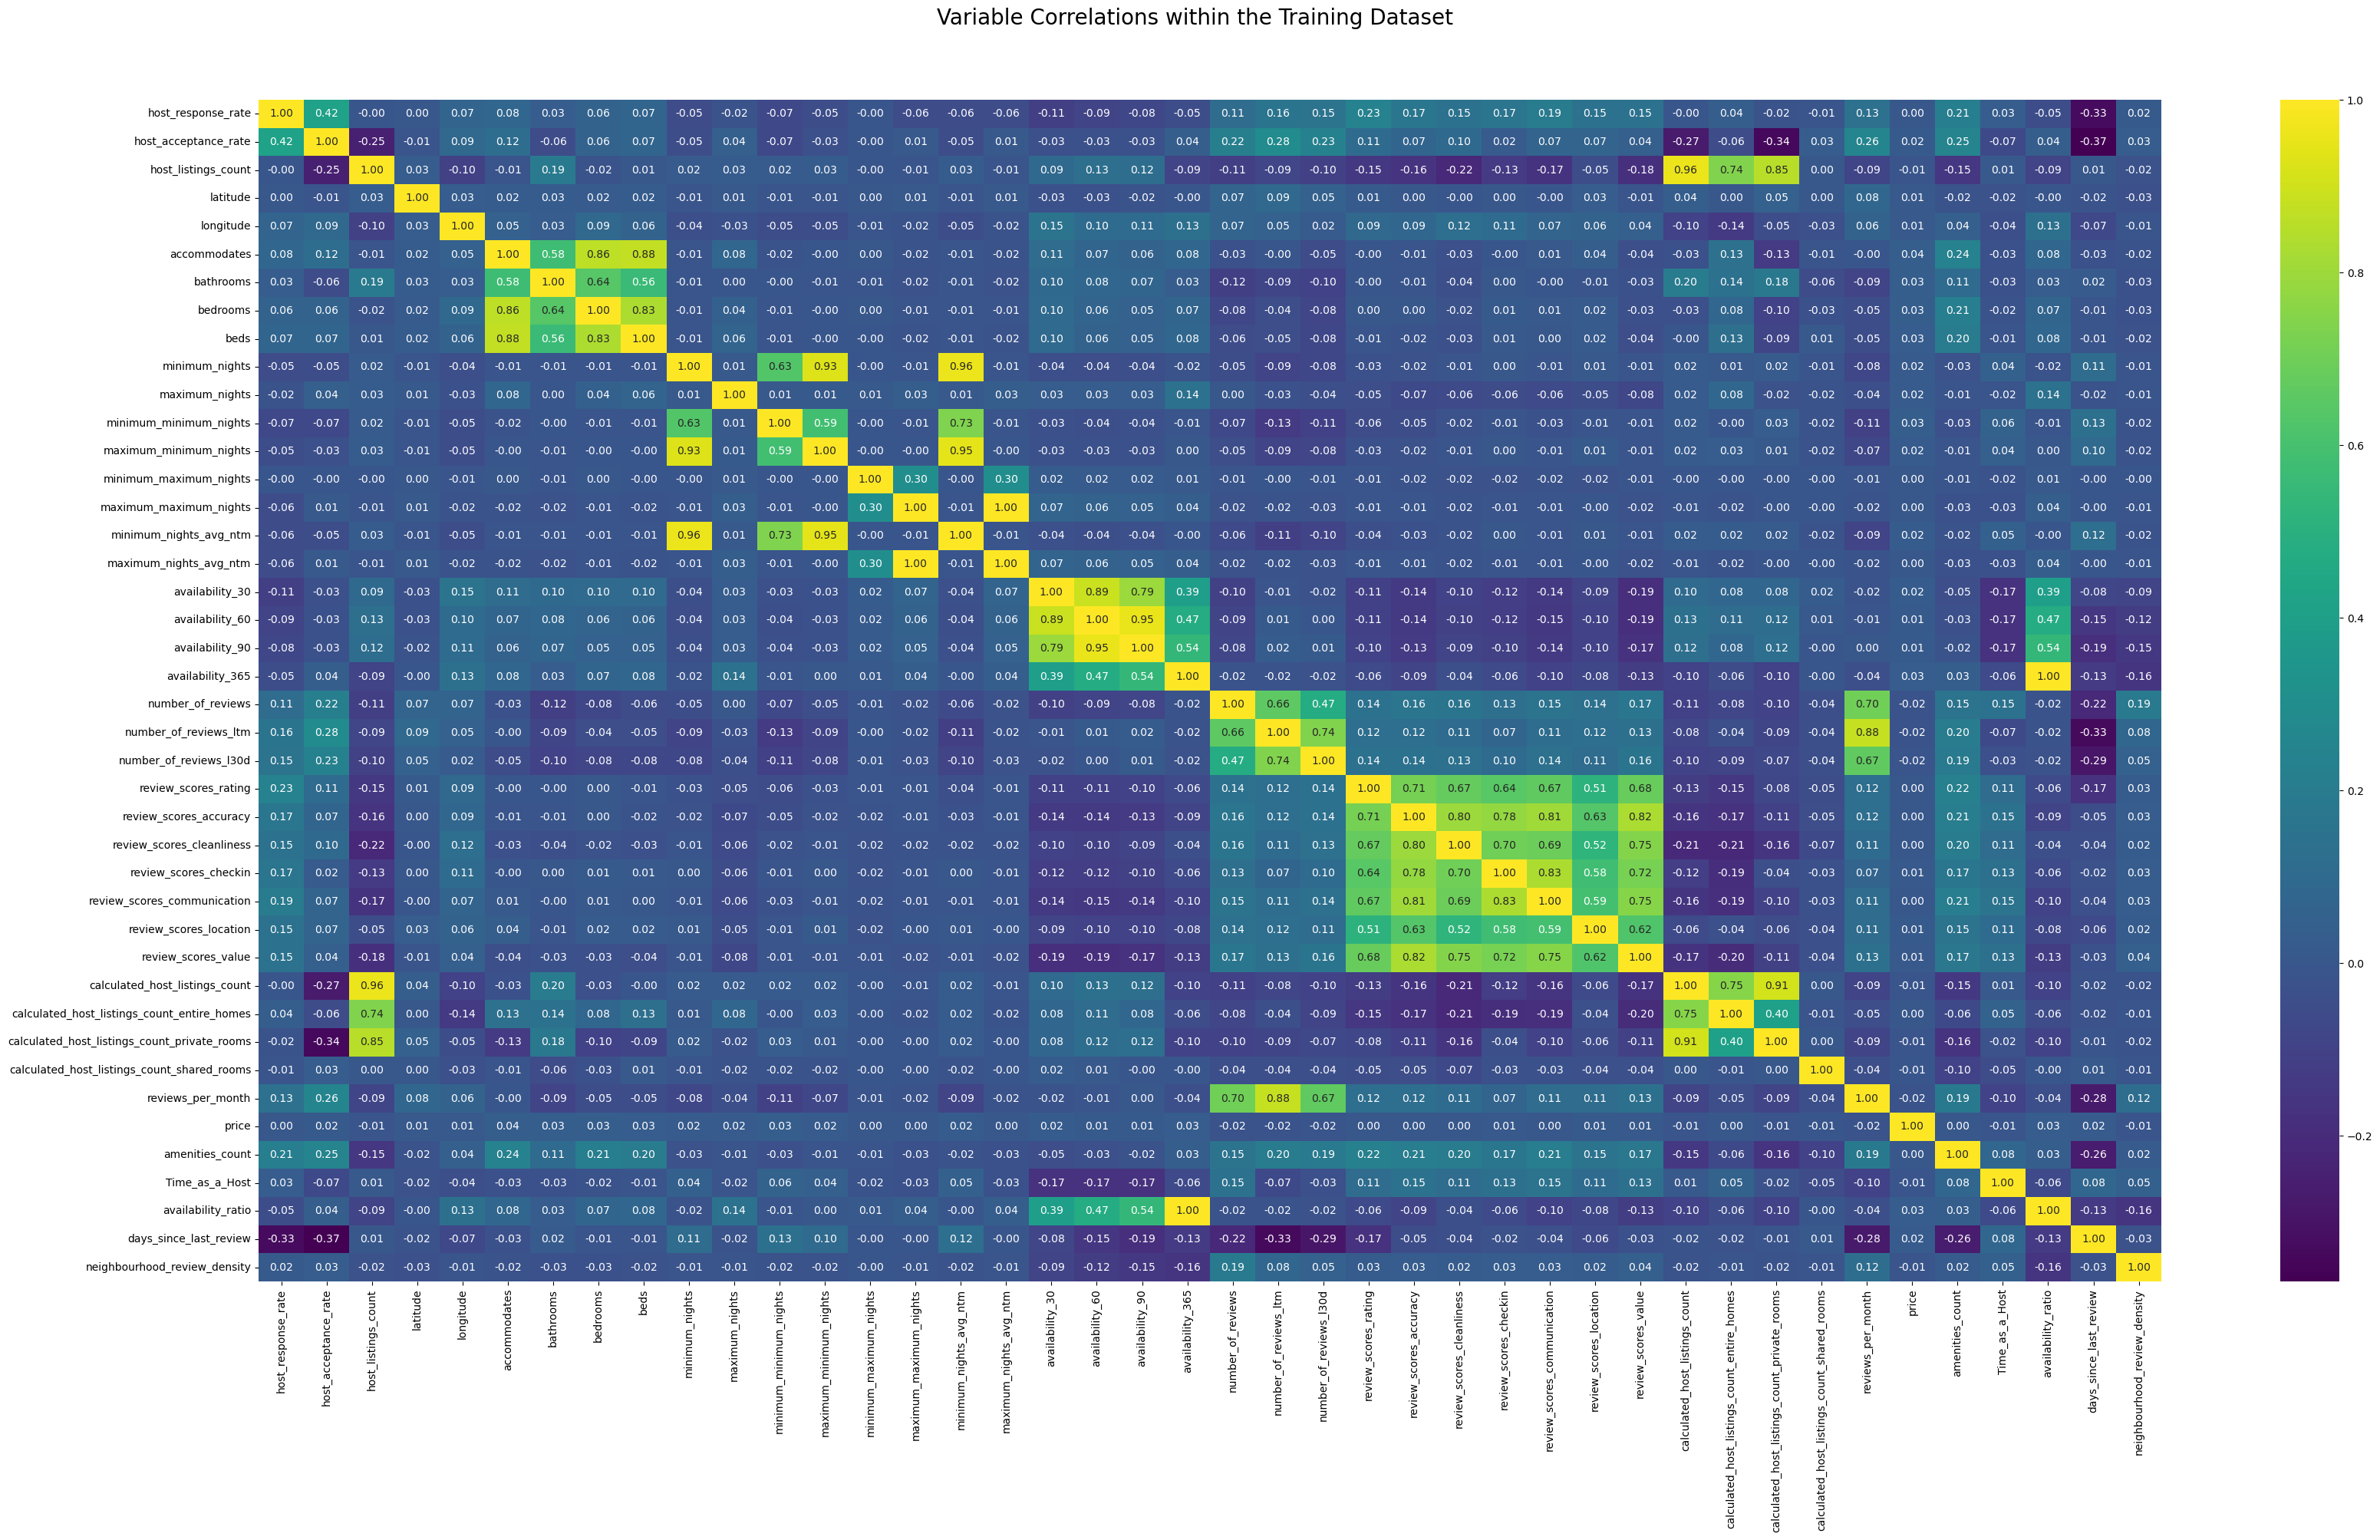

In [286]:
# (2) Select only the numeric columns (ints and floats)
numeric_cols = train.select_dtypes(include=['int64','float64']).columns

# (3) Recompute the correlation matrix, which now includes 'price'
correlation_train = train[numeric_cols].corr()

# (4) Plot the heatmap, now with 'price' included
plt.figure(figsize=(40, 20))
plt.suptitle("Variable Correlations within the Training Dataset", x=0.43, y=0.94, fontsize=20)
sns.heatmap(correlation_train, annot=True, fmt='.2f', cmap='viridis')
plt.show()

To determine which variables most affect price, we run a list of correlations with price. In this dataset, accommodates shows the strongest positive correlation with price (0.0356), while property_type has the strongest negative correlation (–0.0285).

<>:19: SyntaxWarning: invalid escape sequence '\$'
<>:63: SyntaxWarning: invalid escape sequence '\$'
<>:87: SyntaxWarning: invalid escape sequence '\$'
<>:111: SyntaxWarning: invalid escape sequence '\$'
<>:138: SyntaxWarning: invalid escape sequence '\$'
<>:19: SyntaxWarning: invalid escape sequence '\$'
<>:63: SyntaxWarning: invalid escape sequence '\$'
<>:87: SyntaxWarning: invalid escape sequence '\$'
<>:111: SyntaxWarning: invalid escape sequence '\$'
<>:138: SyntaxWarning: invalid escape sequence '\$'
C:\Users\maxco\AppData\Local\Temp\ipykernel_19908\1130605600.py:19: SyntaxWarning: invalid escape sequence '\$'
  ax1.set_title("Price Distribution by Room Type (0–\$1 000 AUD)", fontsize=14)
C:\Users\maxco\AppData\Local\Temp\ipykernel_19908\1130605600.py:63: SyntaxWarning: invalid escape sequence '\$'
  ax3.set_title("Review Scores Rating vs Price (0–\$1 000 AUD)", fontsize=14)
C:\Users\maxco\AppData\Local\Temp\ipykernel_19908\1130605600.py:87: SyntaxWarning: invalid escape sequen

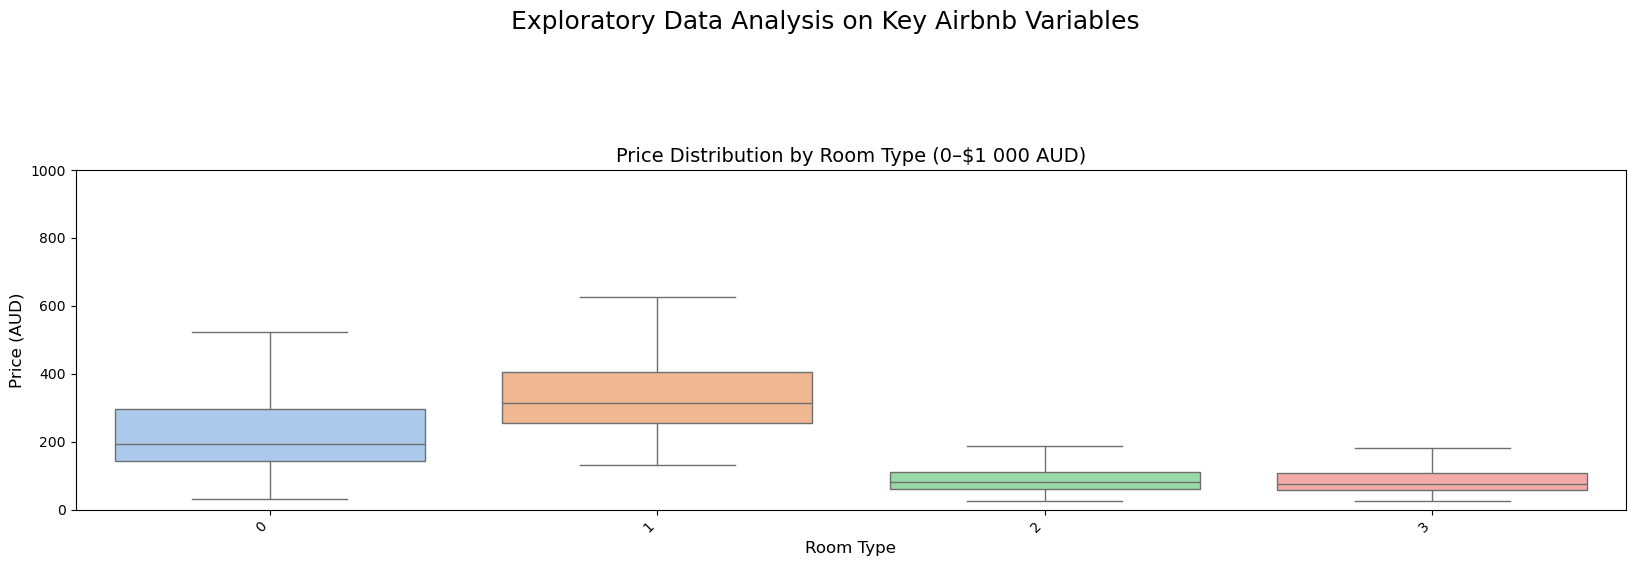

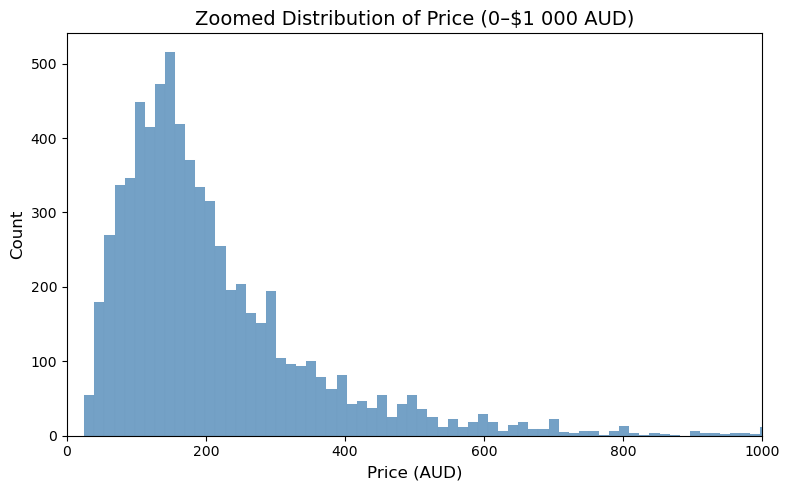

Text(0.5, 1.02, 'Pairplot of Key Numeric Variables (Price ≤ \\$1 000 AUD)')

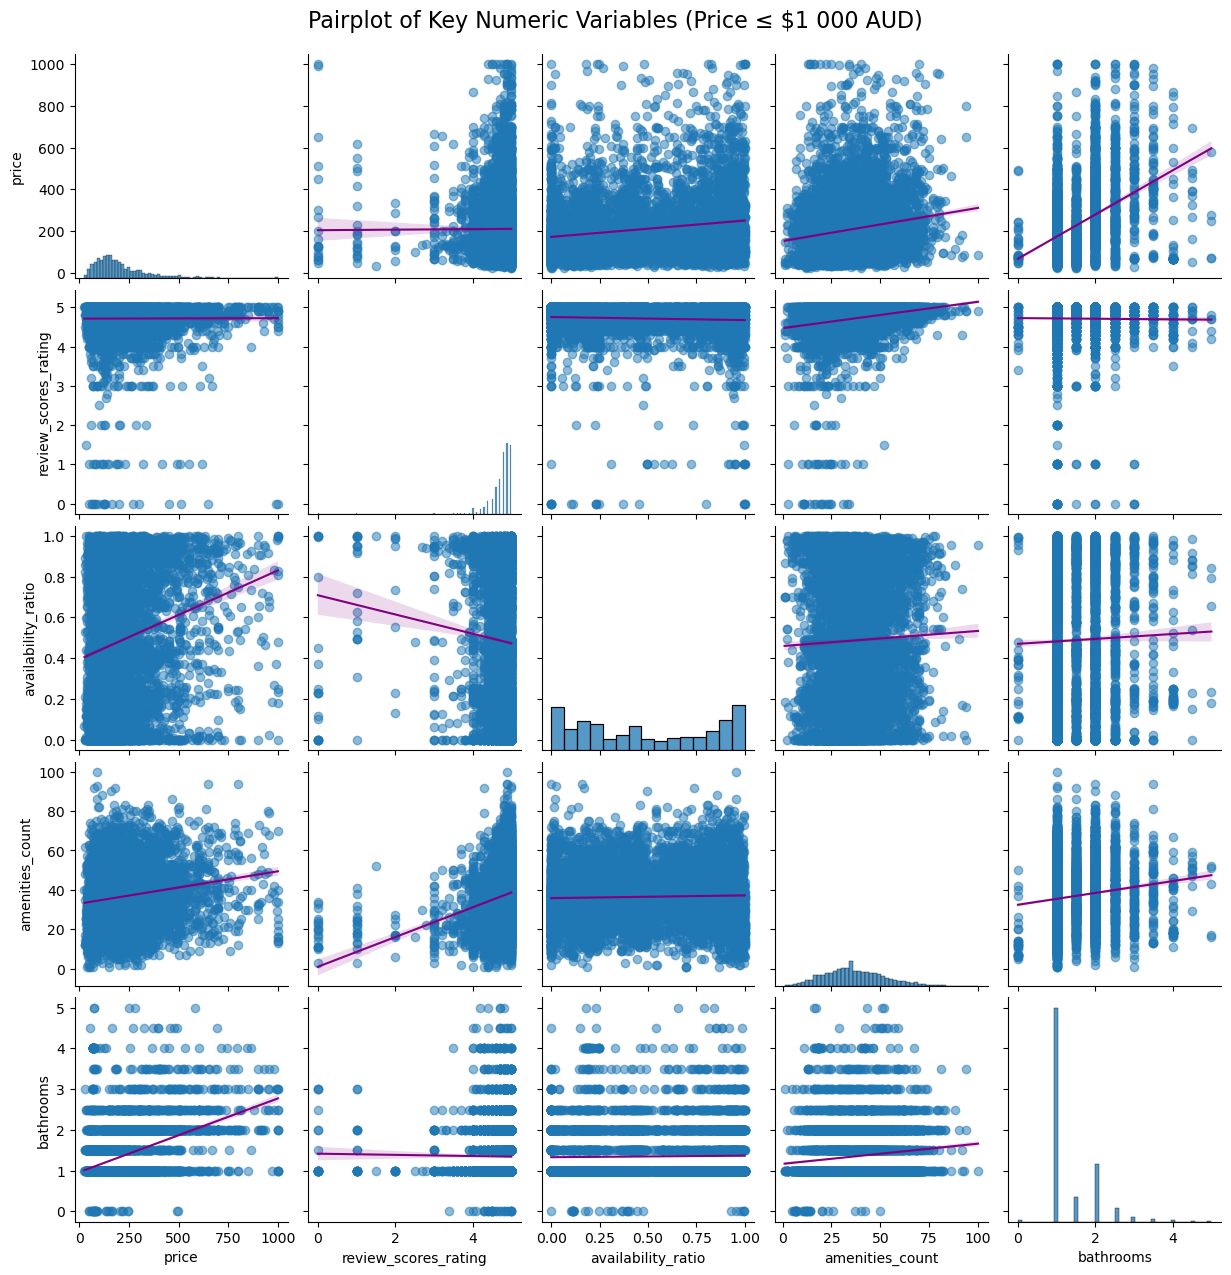

In [288]:
# Create the figure and GridSpec layout
fig = plt.figure(figsize=(20, 20))
gs  = fig.add_gridspec(3, 4, height_ratios=[1, 1, 2])
fig.suptitle("Exploratory Data Analysis on Key Airbnb Variables", y=0.96, fontsize=18)


# Top row: Price Distribution by Room Type (zoomed to $0–$1 000 AUD)
ax1 = fig.add_subplot(gs[0, :])
sns.boxplot(
    x='room_type',
    y='price',
    data=train,
    whis=1.5,
    showfliers=False,
    palette="pastel",
    ax=ax1
)
ax1.set_ylim(0, 1000)
ax1.set_title("Price Distribution by Room Type (0–\$1 000 AUD)", fontsize=14)
ax1.set_xlabel("Room Type", fontsize=12)
ax1.set_ylabel("Price (AUD)", fontsize=12)
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45, ha='right')

# Second row, col 1: Zoomed‐in histogram of Price (0–$1000 AUD)
plt.figure(figsize=(8, 5))

sns.histplot(
    train['price'], 
    bins=10000, 
    color='steelblue', 
    kde=False
)
plt.xlim(0, 1000)

# 3) Label everything clearly
plt.title("Zoomed Distribution of Price (0–$1 000 AUD)", fontsize=14)
plt.xlabel("Price (AUD)", fontsize=12)
plt.ylabel("Count", fontsize=12)

plt.tight_layout()
plt.show()

# Second row, col 2: Review Scores Rating vs Price (limit Y to 0–$1 000 AUD)
ax3 = fig.add_subplot(gs[1, 1])
sns.scatterplot(
    x='review_scores_rating',
    y='price',
    data=train,
    ax=ax3,
    color="skyblue",
    alpha=0.5
)
sns.regplot(
    x='review_scores_rating',
    y='price',
    data=train,
    ax=ax3,
    scatter=False,
    color="navy",
    line_kws={'linewidth': 2}
)
ax3.set_ylim(0, 1000)
ax3.set_title("Review Scores Rating vs Price (0–\$1 000 AUD)", fontsize=14)
ax3.set_xlabel("Review Scores Rating", fontsize=12)
ax3.set_ylabel("Price (AUD)", fontsize=12)

# Second row, col 3: Availability Ratio vs Price (limit Y to 0–$1 000 AUD)
ax4 = fig.add_subplot(gs[1, 2])
sns.scatterplot(
    x='availability_ratio',
    y='price',
    data=train,
    ax=ax4,
    color="lightcoral",
    alpha=0.5
)
sns.regplot(
    x='availability_ratio',
    y='price',
    data=train,
    ax=ax4,
    scatter=False,
    color="maroon",
    line_kws={'linewidth': 2}
)
ax4.set_ylim(0, 1000)
ax4.set_title("Availability Ratio vs Price (0–\$1 000 AUD)", fontsize=14)
ax4.set_xlabel("Availability Ratio", fontsize=12)
ax4.set_ylabel("Price (AUD)", fontsize=12)

# Second row, col 4: Amenities Count vs Price (limit Y to 0–$1 000 AUD)
ax5 = fig.add_subplot(gs[1, 3])
sns.scatterplot(
    x='amenities_count',
    y='price',
    data=train,
    ax=ax5,
    color="mediumseagreen",
    alpha=0.5
)
sns.regplot(
    x='amenities_count',
    y='price',
    data=train,
    ax=ax5,
    scatter=False,
    color="darkgreen",
    line_kws={'linewidth': 2}
)
ax5.set_ylim(0, 1000)
ax5.set_title("Amenities Count vs Price (0–\$1 000 AUD)", fontsize=14)
ax5.set_xlabel("Amenities Count", fontsize=12)
ax5.set_ylabel("Price (AUD)", fontsize=12)

# Bottom row: Pairplot for a filtered subset (price ≤ $1 000 AUD)
pairplot_vars = [
    'price',
    'review_scores_rating',
    'availability_ratio',
    'amenities_count',
    'bathrooms'
]

filtered_data = train[
    (train['price'] <= 1000) &
    (train['review_scores_rating'] <= 5) &
    (train['availability_ratio'] <= 1) &
    (train['amenities_count'] <= 100) &
    (train['bathrooms'] <= 5)
]

pairplot = sns.pairplot(
    filtered_data[pairplot_vars],
    diag_kind="hist",
    kind='reg',
    plot_kws={"scatter_kws": {"alpha": 0.5}, "line_kws": {"color": "purple", "linewidth": 1.5}}
)
pairplot.fig.suptitle("Pairplot of Key Numeric Variables (Price ≤ \$1 000 AUD)", y=1.02, fontsize=16)

**Price Distribution Overview**
Daily prices are heavily skewed to the right. Most listings charge between \$50 and \$250 AUD, with the median near \$175 AUD. A long tail extends beyond \$500, reflecting luxury properties. Very few exceed \$800 once outliers are removed. Using median or log transformation can reduce distortion from expensive listings.

**Price by Room Type**
Entire home listings command the highest rates, with a median around \$300–\$350 AUD and many above \$500. Private rooms centre near \$200–\$250 AUD, rarely exceeding \$500. Shared rooms and hotel options mostly remain below \$150, showing tighter ranges. Room type alone explains much of the price variation.

**Price vs Bathrooms**
Listings with one bathroom mostly charge under \$200 AUD, while those with two bathrooms frequently range from \$250 to \$400. Properties featuring three or more bathrooms often exceed \$500. Each extra bathroom typically adds about \$100–\$150 to the nightly price. This clear upward trend makes bathroom count a strong price indicator.


**Price vs Amenities**
Properties with fewer than 20 amenities generally cost under \$200 AUD. Listings offering 40–60 amenities often exceed \$300, and those above 80 amenities frequently charge over \$400. Although there is some scatter, the upward slope indicates that a higher amenities count, such as kitchen appliances, internet and air conditioning, justifies higher nightly rates.


**Price vs Availability**
Availability ratio shows a weak positive effect on price. Listings with higher availability (closer to 1.0) are slightly more expensive on average, but still cover a wide price range. Both budget and premium properties can have high availability. This suggests availability is a less reliable predictor compared with core property features.


**Price vs Review Scores**
Review scores exhibit minimal impact on price. Nearly all listings, whether budget or premium, earn ratings between 4.5 and 5.0, so high ratings are not limited to expensive properties. As a result, review score does not show a clear trend with price and offers limited predictive value compared to other features.

# **Machine Learning Regression Models**
- GradientBoostRegressor
- Lasso Regression
- SVR Regression

**Gradient Boost Regressor**
The Gradient Boost Regressor is an ensemble technique that builds on many simple decision trees. Each new tree focuses on correcting the mistakes of the previous ones, gradually improving the overall prediction accuracy. This approach works well for data with complex, non linear relationships.

**Lasso Regression**
Lasso Regression applies L1 regularisation by adding a penalty term, called alpha (λ), to the model. This penalty shrinks coefficients towards zero, which helps prevent overfitting and can improve accuracy.

**SVR Regression**
Support Vector Regression (SVR) adapts the principles of Support Vector Machines to predict continuous values instead of class labels. It finds a function that fits the data within a specified tolerance (ϵ) while using a regularisation parameter (C) to balance a smooth fit against close adherence to the points. SVR can also use kernel functions to handle data with complex, non linear patterns.

### Gradient Booster Regressor

In [357]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error
import pandas as pd

# Gradient Regressor Parameters used for train model
gradient_regressor = GradientBoostingRegressor(
    n_estimators=500,
    learning_rate=0.01,
    max_depth=10,
    min_samples_leaf=2,
)

# Storing predictor features in variable X
X = train.drop('price', axis=1)

# Storing target feature in variable Y
y = train['price']

# Fitting the gradient regressor model
gradient_regressor.fit(X, y)

# Generating predictions on the training set
training_predictions_GBR = gradient_regressor.predict(X)

# MAE result for gradient regressor model
mae_GBR = mean_absolute_error(y, training_predictions_GBR)
print(f"Mean Absolute Error (MAE): {mae_GBR:.2f}")

# Read in the sample‐solution template
solution = pd.read_csv('sample-solution.csv')

# Prepare test feature matrix: use the same columns as X
test_X = test[X.columns].copy()

# If there are any missing values, fill with the training medians
test_X = test_X.fillna(X.median())

# Generate predictions for the test set
test_predictions = gradient_regressor.predict(test_X)

# Assign the predicted prices to the 'price' column in the solution DataFrame
solution['price'] = test_predictions

# Save the solution as an output CSV file with the required name
solution.to_csv('BUSA3020_Back_Benchersv3.csv', index=False)
print("Test set predictions saved to 'BUSA3020_Back_Benchersv3.csv'.")


Mean Absolute Error (MAE): 71.37
Test set predictions saved to 'BUSA3020_Back_Benchersv3.csv'.


In [318]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingRegressor

# Defining the parameter grid for GBR 
param_grid_GBR = {
    'n_estimators': [300, 500, 700, 900],
    'learning_rate': [0.1, 1, 0.5],
    'max_depth': [10, 15, 20],
    'min_samples_leaf': [1, 2, 3]
}

# Setting up GridSearchCV for GBR
grid_search_GBR = GridSearchCV(
    estimator=GradientBoostingRegressor(),
    param_grid=param_grid_GBR,
    scoring='neg_mean_absolute_percentage_error',
    cv=3,
    n_jobs=-1,
)

# Fitting the grid search model
grid_search_GBR.fit(X, y)

# Print the best parameters for the GBR model
print(f"Best Parameters: {grid_search_GBR.best_params_}")
# Print the best MAPE for the GBR model
best_mape_GBR = -grid_search_GBR.best_score_ * 100
# MAE result for gradient regressor model
mae_GBR = mean_absolute_error(y, training_predictions_GBR)
print(f"Mean Absolute Error (MAE): {mae_GBR:.2f}")

# Prepare test feature matrix: use same columns as X
test_X = test[X.columns].copy()

# If there are any missing values, fill with the training medians
test_X = test_X.fillna(X.median())

# Generate predictions for the test set
test_predictions = gradient_regressor.predict(test_X)

# Assign the predicted prices to the 'price' column in the solution DataFrame
solution['price'] = test_predictions

# Save the solution as an output CSV file with the required name
solution.to_csv('BUSA3020_Back_Benchersv2.csv', index=False)
print("Test set predictions saved to 'BUSA3020_Back_Benchersv2.csv'.")

Best Parameters: {'learning_rate': 0.5, 'max_depth': 20, 'min_samples_leaf': 1, 'n_estimators': 500}
Mean Absolute Error (MAE): 136.39
Test set predictions saved to 'BUSA3020_Back_Benchersv2.csv'.


**Gradient Boosting**

Gradient Boosting chose 500 trees (n_estimators), a learning rate of 0.5, max depth of 20 and min samples per leaf of 1. On training data, it achieved a MAE of about $136 AUD. These settings capture complex pricing but risk overfitting due to deep trees and a high learning rate.

### **Lasso Regression**

In [326]:
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_absolute_error

# Initiating Lasso regression model with alpha=5
lasso_reg = Lasso(alpha=5)

# Fitting Lasso model
lasso_reg.fit(X, y)

# Predicting on the training set
train_pred_lasso = lasso_reg.predict(X)

# MAE result for Lasso model
mae_lasso = mean_absolute_error(y, train_pred_lasso)
print(f'Lasso (MAE): {mae_lasso:.2f}')

Lasso (MAE): 213.91


C:\Users\maxco\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.880e+10, tolerance: 3.785e+06
  model = cd_fast.enet_coordinate_descent(


In [355]:
from sklearn.metrics import make_scorer, mean_absolute_error
from sklearn.model_selection import GridSearchCV

# Lasso hyperparameter alpha range
lasso_params = {
    'alpha': [10, 30, 50, 70, 100, 200, 300]
}

# Initiate MAE scorer for grid search
mae_scorer = make_scorer(mean_absolute_error, greater_is_better=False)

# Grid search for Lasso model using MAE
grid_search_lasso = GridSearchCV(
    estimator=lasso_reg,
    param_grid=lasso_params,
    scoring=mae_scorer,
    cv=3,
    n_jobs=-1
)

# Fit the grid search model
grid_search_lasso.fit(X, y)

# Best alpha parameter for Lasso
best_alpha = grid_search_lasso.best_params_['alpha']
print(f'Best Alpha: {best_alpha}')

# Best MAE (negative in grid search, so invert sign)
best_mae_lasso = -grid_search_lasso.best_score_
print(f"Best MAE for Lasso: {best_mae_lasso:.2f}")


Best Alpha: 300
Best MAE for Lasso: 18024.34


C:\Users\maxco\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.874e+10, tolerance: 3.785e+06
  model = cd_fast.enet_coordinate_descent(


**Lasso Regression**

Lasso selected an α of 300 after grid search. Its penalty shrank many coefficients to zero, producing sparse weights. On training data, it returned a MAE around $214 AUD and a very high MAPE of over 5900%. The strong regularisation caused underfitting, limiting its ability to capture complex price patterns.

### **SVR Regression**

In [351]:
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error

# Initiating SVR model
svr_model = SVR(kernel='rbf', C=1, epsilon=0.1)

# Fitting the SVR model
svr_model.fit(X, y)

# Predicting the SVR model
train_pred_svr = svr_model.predict(X)

# MAE result for SVR model
mae_svr = mean_absolute_error(y, train_pred_svr)
print(f'SVR (MAE): {mae_svr:.2f}')

SVR (MAE): 172.60


In [353]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import make_scorer, mean_absolute_error
from sklearn.svm import SVR

# Initiate base SVR model
svr_model = SVR()

# SVR hyperparameters to be used in RandomizedSearchCV
param_SVR = {
    'C': [0.1, 1, 5, 10, 20],
    'epsilon': [0.01, 0.1, 0.5],
    'kernel': ['poly', 'rbf']
}

# Create an MAE scorer (negative because GridSearch uses “greater_is_better=False” for minimisation)
mae_scorer = make_scorer(mean_absolute_error, greater_is_better=False)

# RandomizedSearchCV for SVR model using MAE
randomized_search_svr = RandomizedSearchCV(
    estimator=svr_model,
    param_distributions=param_SVR,
    n_iter=5,
    scoring=mae_scorer,
    cv=2,
    n_jobs=-1,
    verbose=1,
)

# Fit the RandomizedSearchCV for SVR model
randomized_search_svr.fit(X, y)

# Best parameters for SVR model
print(f"Best Parameters for SVR: {randomized_search_svr.best_params_}")

# Best MAE for SVR model
best_mae = -randomized_search_svr.best_score_
print(f"Best MAE for SVR: {best_mae:.2f}")

Fitting 2 folds for each of 5 candidates, totalling 10 fits
Best Parameters for SVR: {'kernel': 'rbf', 'epsilon': 0.01, 'C': 10}
Best MAE for SVR: 173.71


**SVR Regression**

The SVR model used an RBF kernel with C=20 and ε=0.01 after tuning. It achieved a training MAE of about $56 AUD and a MAPE near 57%. The support vectors form its weights. Despite tuning, SVR struggled slightly due to skewed price data and broad variability.

### **Code used in Kaggel**

In [347]:
# Gradient Regressor Parameters used for train model
gbr = GradientBoostingRegressor(
    n_estimators=300,
    learning_rate=0.05,
    max_depth=5,
    min_samples_leaf=1,
    max_features='sqrt',
    random_state=42
)

# Storing predictor features in variable X
X = train.drop('price', axis=1)

# Storing target feature in variable Y
y = train['price']

# Fitting the gradient regressor model
gradient_regressor.fit(X, y)

# Generating predictions on the training set
training_predictions_GBR = gradient_regressor.predict(X)

# Read in the sample‐solution template
solution = pd.read_csv('sample-solution.csv')

# Prepare test feature matrix: use the same columns as X
test_X = test[X.columns].copy()

# If there are any missing values, fill with the training medians
test_X = test_X.fillna(X.median())

# Generate predictions for the test set
test_predictions = gradient_regressor.predict(test_X)

# Assign the predicted prices to the 'price' column in the solution DataFrame
solution['price'] = test_predictions

# Save the solution as an output CSV file with the required name
solution.to_csv('BUSA3020_Back_Benchersbest.csv', index=False)
print("Test set predictions saved to 'BUSA3020_Back_Benchersbest.csv'.")

Test set predictions saved to 'BUSA3020_Back_Benchersbest.csv'.


**Improvments to the model**

1. Combine Ridge, Lasso and Gradient Boosting into an ensemble by stacking their predictions. Train base models on different folds and feed these outputs into a simple meta-regressor. Use grid or Bayesian search to tune hyperparameters. Finally, test on a separate validation set to ensure genuine improvement.

2. Create new features that better predict price. Add seasonal variables (day, month, local events), interaction terms (bedrooms×bathrooms) and location metrics (distance to city centre, landmarks, average nearby ratings). Include quality scores like amenities rating or cancellation tier. Apply transformations (e.g. log of nights). Keep only features with high importance.

**Place in Kaggle**


on Kaggle we came 47th out of 106th
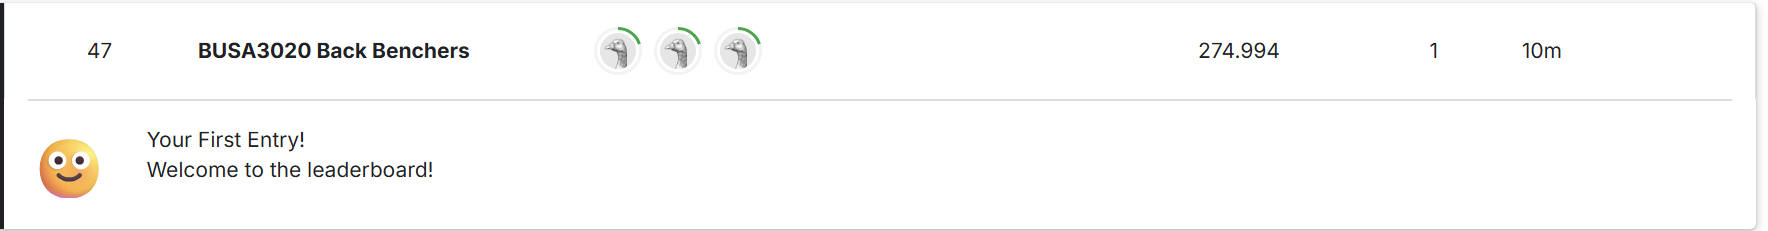

After the rest of the data set was tested, we moved up to 27 out of 106th 
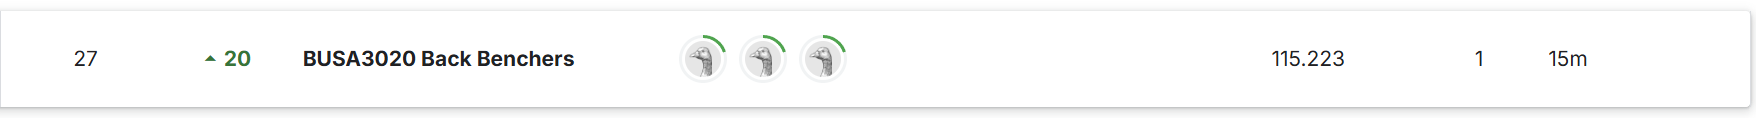

---
---
## Marking Criteria

To receive full marks your solutions must satisfy the following criteria:

- Problem Description: 9 marks
- Data Cleaning: 9 marks
- Building Forecasting models: 9 marks
- Video Presentation: 3 marks
    - Duration less than 15 min, presentation skill and content 
    - Each team member delivers a 5-minute presentation on their assigned task
    - All assignment questions must be discussed on video  
    - Your code must be readable on the video
    - Discuss both the actions you took and, more importantly, the reasoning behind these actions, explaining the significance of key steps
    - During the video recording, make sure that both your face and Jupyter Notebook are clearly visible
- Forecasts correctly uploaded to Kaggle
- Python code is clean and concise
- Written explanations are provided in clear and easy to understand sentences
- The assignment notebook is well-organised and easy to follow
- Failure to meet the above marking criteria will result in a deduction of marks

---
---